In [1]:
import os
import joblib
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
from scipy.stats import skew
from numba import generated_jit
import warnings
warnings.filterwarnings('ignore')

C:\Users\uidn4858\AppData\Local\miniconda3\envs\credit_approval_venv\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\uidn4858\AppData\Local\miniconda3\envs\credit_approval_venv\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


### Data Understanding

In [2]:
df = pd.read_csv('../data/credit_dataset.csv')
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [4]:
#Check if there are null values
df.isnull().sum()


Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

### Data Cleaning

In [5]:
# Remove useless collumns
df.drop(columns=["ZipCode", "DriversLicense"], axis=1, inplace=True)


In [6]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,ByBirth,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,ByBirth,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,ByBirth,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,ByBirth,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,ByOtherMeans,0,1


In [7]:
df.nunique()

Gender             2
Age              350
Debt             215
Married            2
BankCustomer       2
Industry          14
Ethnicity          5
YearsEmployed    132
PriorDefault       2
Employed           2
CreditScore       23
Citizen            3
Income           240
Approved           2
dtype: int64

In [8]:
# Check if there are duplicates
df.duplicated().value_counts()

False    690
dtype: int64

### EDA

In [9]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,ByBirth,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,ByBirth,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,ByBirth,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,ByBirth,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,ByOtherMeans,0,1


In [10]:
df.tail()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,ByBirth,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,ByBirth,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,ByBirth,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,ByBirth,750,0
689,1,35.00,3.375,1,1,Energy,Black,8.29,0,0,0,ByBirth,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         690 non-null    int64  
 1   Age            690 non-null    float64
 2   Debt           690 non-null    float64
 3   Married        690 non-null    int64  
 4   BankCustomer   690 non-null    int64  
 5   Industry       690 non-null    object 
 6   Ethnicity      690 non-null    object 
 7   YearsEmployed  690 non-null    float64
 8   PriorDefault   690 non-null    int64  
 9   Employed       690 non-null    int64  
 10  CreditScore    690 non-null    int64  
 11  Citizen        690 non-null    object 
 12  Income         690 non-null    int64  
 13  Approved       690 non-null    int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 75.6+ KB


In [12]:
[c for c in df.columns if df[c].dtype=="object"]

['Industry', 'Ethnicity', 'Citizen']

In [13]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,100000.000000,1.000000


In [14]:
df.shape

(690, 14)

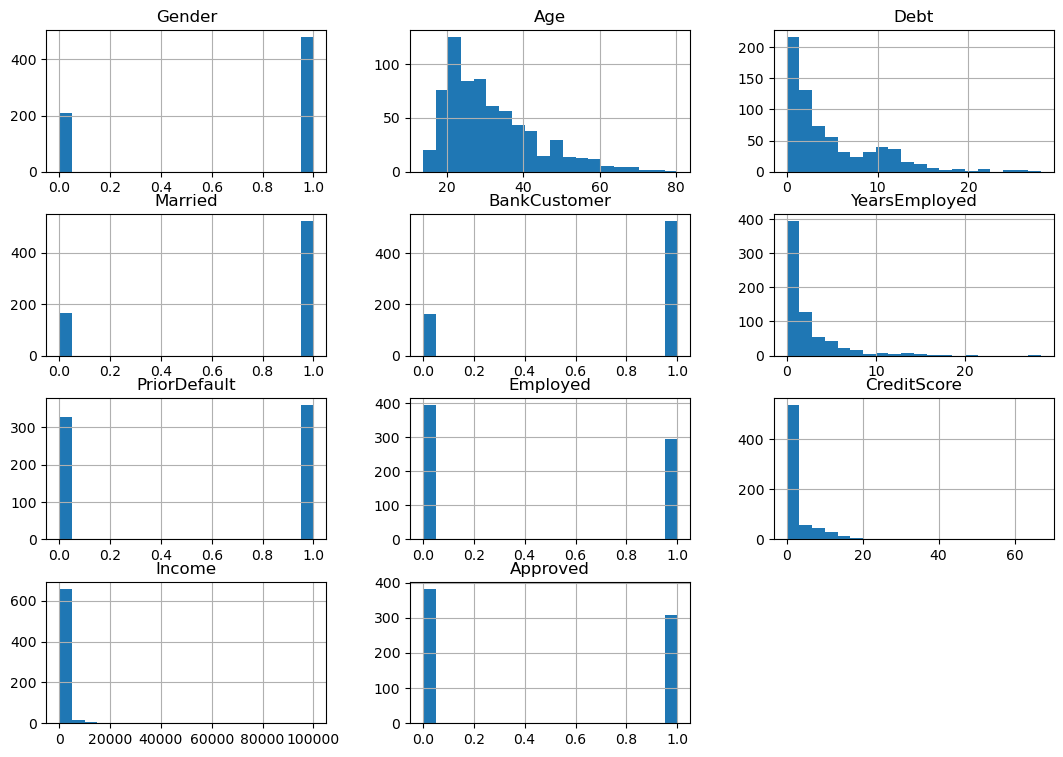

In [15]:
# Create histogram for numerical collumns
df.hist(figsize=(13, 9), bins=20)
plt.show()

In [16]:
print(f"Skewness for Age: {skew(df['Age'])}")
print(f"Skewness for Debt: {skew(df['Debt'])}")
print(f"Skewness for CreditScore: {skew(df['CreditScore'])}")



Skewness for Age: 1.1647650704131591
Skewness for Debt: 1.4855746179702647
Skewness for CreditScore: 5.141311956483638


In [17]:
df["Debt"] = np.log1p(df["Debt"])
df["Age"] = np.sqrt(df["Age"])
df["CreditScore"] = np.log1p(df["CreditScore"])


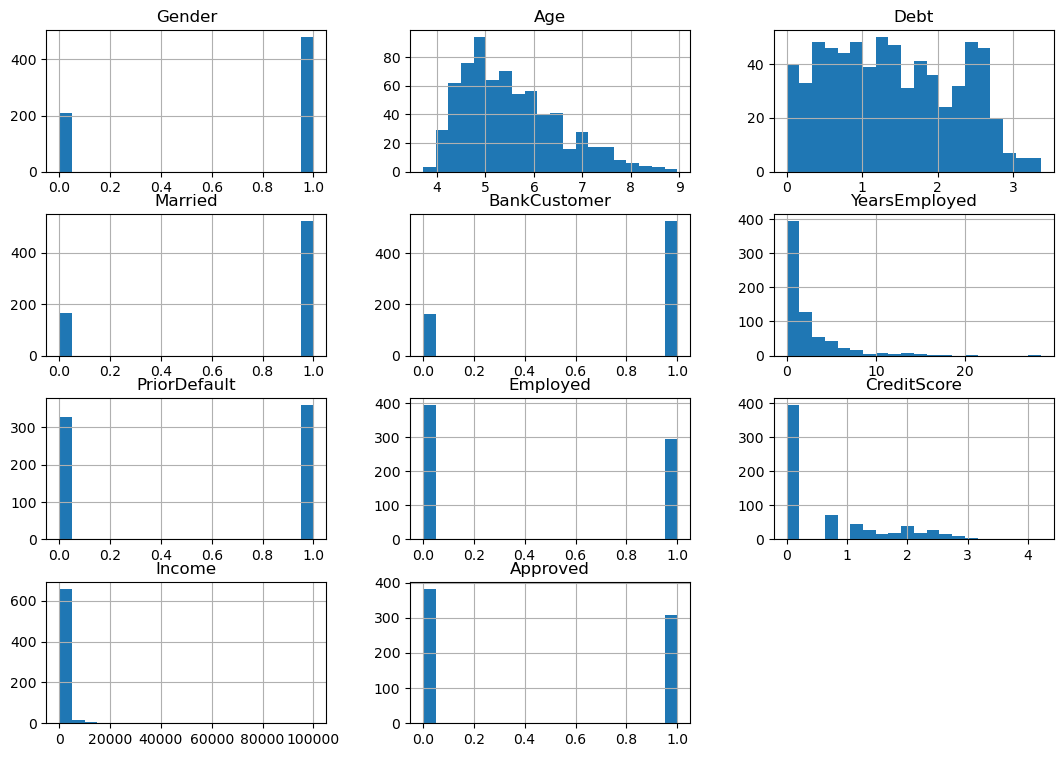

In [18]:
df.hist(figsize=(13, 9), bins=20)
plt.show()

In [19]:
print(f"Skewness pentru Age: {skew(df['Age'])}")
print(f"Skewness pentru Debt: {skew(df['Debt'])}")
print(f"Skewness pentru CreditScore: {skew(df['CreditScore'])}")

Skewness pentru Age: 0.7662257161012171
Skewness pentru Debt: 0.1721318192512319
Skewness pentru CreditScore: 1.0486272251231317


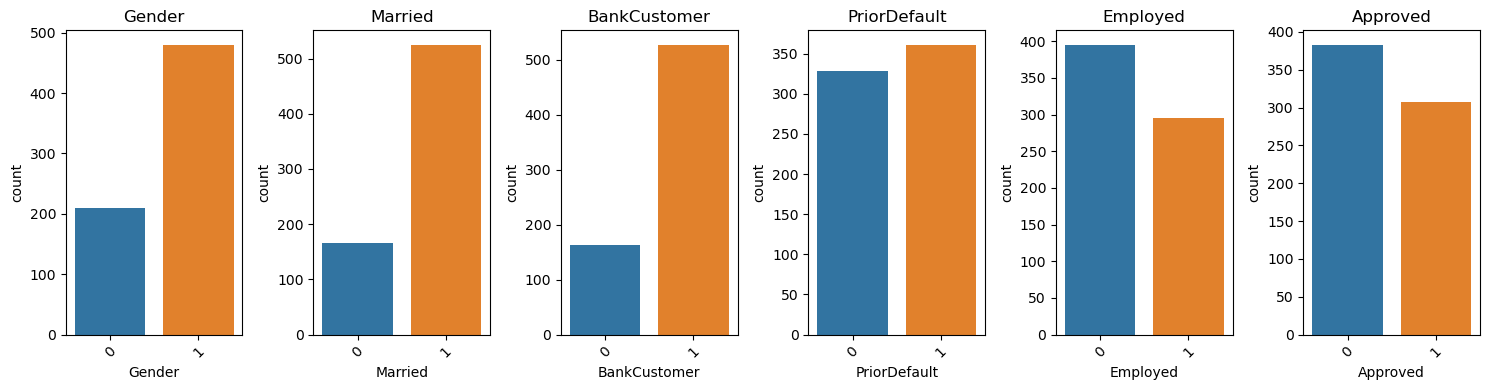

In [20]:
binary_cols = ["Gender", "Married", "BankCustomer", "PriorDefault", "Employed", "Approved"]

fig, axes = plt.subplots(1, len(binary_cols), figsize=(15, 4))

for i, col in enumerate(binary_cols):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


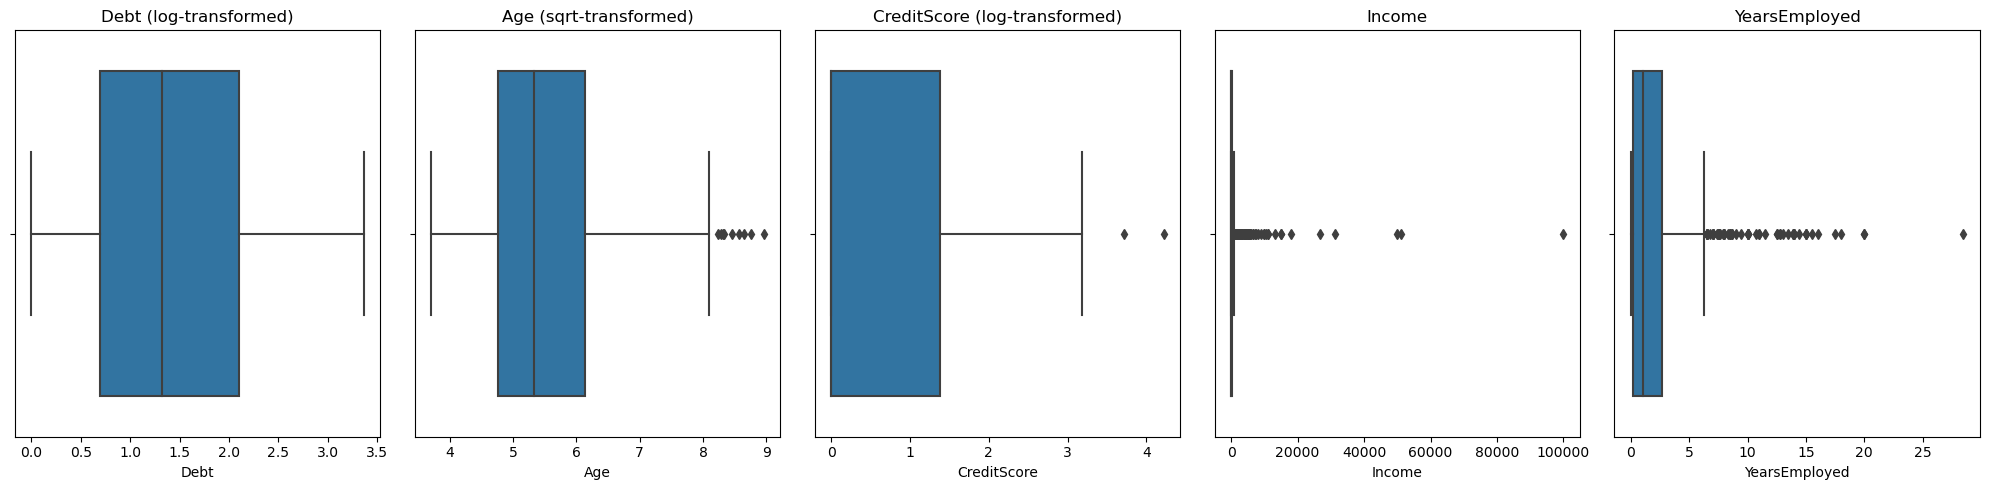

In [21]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

sns.boxplot(x=df["Debt"], ax=axes[0])
axes[0].set_title("Debt (log-transformed)")

sns.boxplot(x=df["Age"], ax=axes[1])
axes[1].set_title("Age (sqrt-transformed)")

sns.boxplot(x=df["CreditScore"], ax=axes[2])
axes[2].set_title("CreditScore (log-transformed)")

sns.boxplot(x=df["Income"], ax=axes[3])
axes[3].set_title("Income")

sns.boxplot(x=df["YearsEmployed"], ax=axes[4])
axes[4].set_title("YearsEmployed")

plt.tight_layout()
plt.show()

In [22]:
df["Income"] = np.log1p(df["Income"])
df["YearsEmployed"] = np.log1p(df["YearsEmployed"])


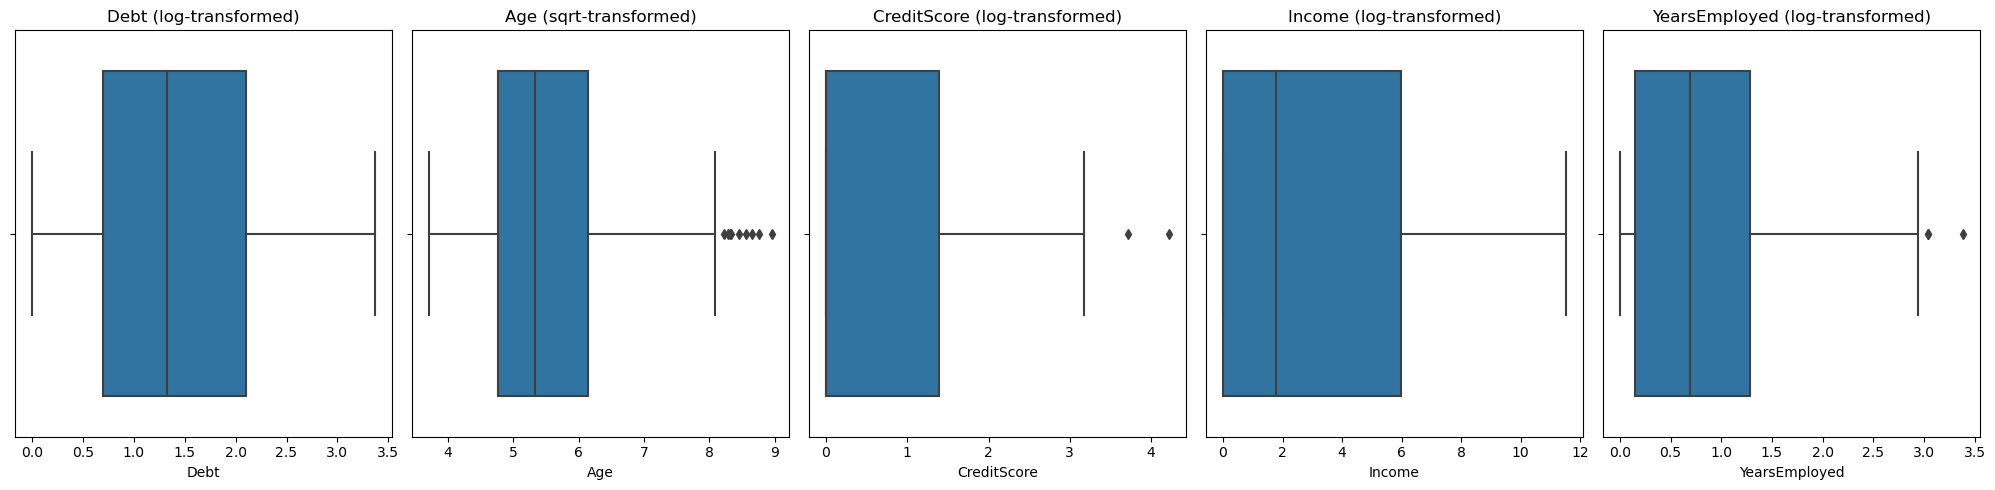

In [23]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

sns.boxplot(x=df["Debt"], ax=axes[0])
axes[0].set_title("Debt (log-transformed)")

sns.boxplot(x=df["Age"], ax=axes[1])
axes[1].set_title("Age (sqrt-transformed)")

sns.boxplot(x=df["CreditScore"], ax=axes[2])
axes[2].set_title("CreditScore (log-transformed)")

sns.boxplot(x=df["Income"], ax=axes[3])
axes[3].set_title("Income (log-transformed)")

sns.boxplot(x=df["YearsEmployed"], ax=axes[4])
axes[4].set_title("YearsEmployed (log-transformed)")

plt.tight_layout()
plt.show()

In [24]:
non_binary_cols=[c for c in df.columns if df[c].dtype=="object"]
print("Non-binary cols:", non_binary_cols)

Non-binary cols: ['Industry', 'Ethnicity', 'Citizen']


In [25]:
# Apply Encoder function
def ApplyEncoder(df, column):
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    return df

In [26]:
for col in non_binary_cols:
    df = ApplyEncoder(df, col)


In [27]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
0,1,5.552477,0.000000,1,1,7,4,0.810930,1,1,0.693147,0,0.000000,1
1,0,7.659634,1.697449,1,1,9,1,1.396245,1,1,1.945910,0,6.329721,1
2,0,4.949747,0.405465,1,1,9,1,0.916291,1,0,0.000000,0,6.715383,1
3,1,5.275415,0.932164,1,1,7,4,1.558145,1,1,1.791759,0,1.386294,1
4,1,4.491102,1.890850,1,1,7,4,0.996949,1,0,0.000000,1,0.000000,1


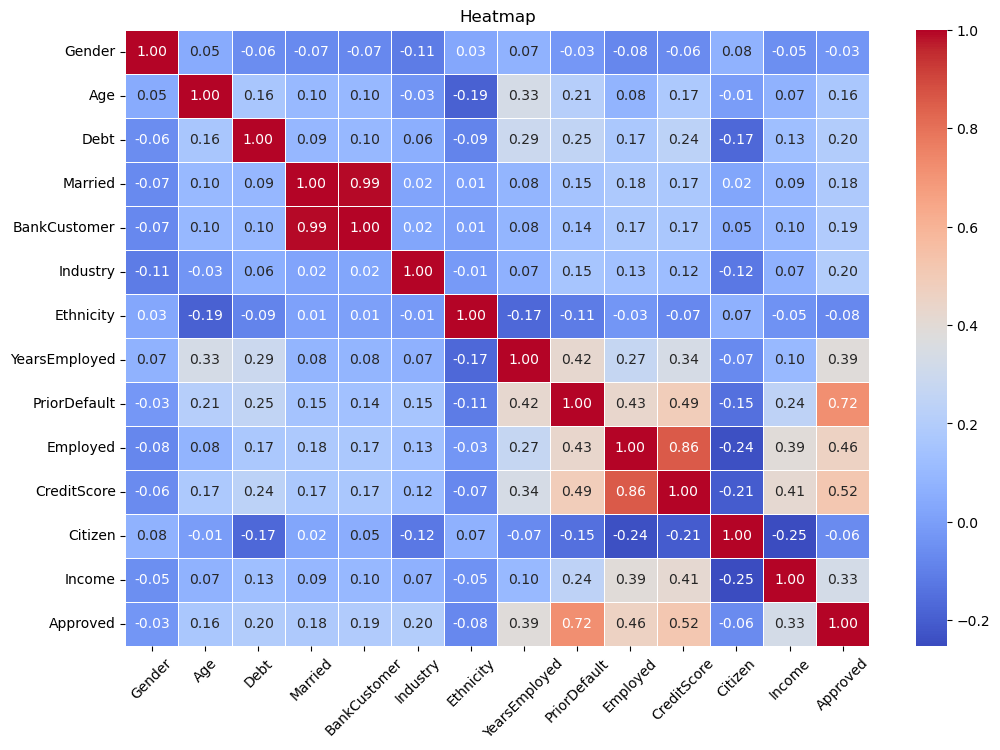

In [28]:

plt.figure(figsize=(12, 8))  # Setăm dimensiunea heatmap-ului
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45)  # Rotim etichetele pentru lizibilitate
plt.title("Heatmap")
plt.show()


In [29]:
df.to_csv("output_data.csv", index=False)


In [30]:
correlation = df[["Married", "BankCustomer"]].corr()
print(correlation)


               Married  BankCustomer
Married       1.000000      0.992033
BankCustomer  0.992033      1.000000


In [31]:
identical_percentage = (df["Married"] == df["BankCustomer"]).sum() / len(df)
print(f"Identical: {identical_percentage * 100:.2f}%")


Identical: 99.71%


In [32]:
print(df["Married"].value_counts(normalize=True))
print(df["BankCustomer"].value_counts(normalize=True))


1    0.76087
0    0.23913
Name: Married, dtype: float64
1    0.763768
0    0.236232
Name: BankCustomer, dtype: float64


In [33]:

X = df.drop(columns=["Approved"])
y = df["Approved"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = RandomForestClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
acc1 = accuracy_score(y_test, y_pred1)


X_train = X_train.drop(columns=["BankCustomer"])
X_test = X_test.drop(columns=["BankCustomer"])

model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)

print(f"Accuracy with BankCustomer: {acc1:.4f}")
print(f"Accuracy wo BankCustomer: {acc2:.4f}")

Accuracy with BankCustomer: 0.8478
Accuracy wo BankCustomer: 0.8623


In [34]:
df.to_csv("output_data1.csv", index=False)

In [35]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClasifiction:\n", classification_report(y_true, y_pred))

    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1}


In [36]:
metrics = evaluate_model(y_test, y_pred1)
metrics2 = evaluate_model(y_test, y_pred2)


Accuracy: 0.8478
Precision: 0.8551
Recall: 0.8429
F1-Score: 0.8489

Clasifiction:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85        68
           1       0.86      0.84      0.85        70

    accuracy                           0.85       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.85      0.85      0.85       138

Accuracy: 0.8623
Precision: 0.8696
Recall: 0.8571
F1-Score: 0.8633

Clasifiction:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86        68
           1       0.87      0.86      0.86        70

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138



In [37]:
# Importuri pentru modele clasice
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Importuri pentru modele avansate (Gradient Boosting)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


models = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = evaluate_model(y_test, y_pred)

# Creăm un tabel pentru comparație
comparison = pd.DataFrame(results).T
print(comparison)

Accuracy: 0.8623
Precision: 0.8696
Recall: 0.8571
F1-Score: 0.8633

Clasifiction:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86        68
           1       0.87      0.86      0.86        70

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138

Accuracy: 0.8551
Precision: 0.8571
Recall: 0.8571
F1-Score: 0.8571

Clasifiction:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        68
           1       0.86      0.86      0.86        70

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138

Accuracy: 0.8261
Precision: 0.8485
Recall: 0.8000
F1-Score: 0.8235

Clasifiction:
               precision    recall  f1-score   support

           0       0.81      0.85      0.8

In [38]:
joblib.dump(model, "model.pkl")

['model.pkl']